Уважаемые студенты!

Задачи выполняются с помощью стандартных библиотек питона без установки сторонних библиотек. Все задачи направлены на проверку усвоения пройденного материала. Вспомните как работать с библиотекой Pandas.

Желаем удачи!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

**Задача №1**. **Создание и базовый анализ DataFrame:**

- Создайте DataFrame из словаря, где ключи — имена столбцов, а значения — списки данных.
- Выполните базовый анализ данных с помощью методов head(), info(), describe() и shape.


In [4]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, 30, 35, 29, 40],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань']
}

# Создал
df = pd.DataFrame(data)
# Первые 3 строки
df.head(3)
# Статистика по столбцам
df.info()
# Описательные статистики для кол. переменной
df.describe()
# Размерность
df.shape
# (5, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Имя      5 non-null      object
 1   Возраст  5 non-null      int64 
 2   Город    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


(5, 3)

**Задача №2**. **Работа с индексами и фильтрация:**

- Отфильтруйте строки, основываясь на значениях в одном или нескольких столбцах.


In [6]:
df = pd.DataFrame(data)

# Вообще как угодно что ли фильтровать?

df = df.query('Возраст > 29 and Город == "Санкт-Петербург"')
df

,Имя,Возраст,Город
1,Борис,30,Санкт-Петербург


**Задача №3**. **Обработка отсутствующих данных:**

  - Заполните отсутствующие значения методом fillna(), используя среднее значение по столбцу.
  - Удалите строки с отсутствующими значениями методом dropna().


In [8]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, np.nan, 35, 29, np.nan],
    'Город': ['Москва', 'Санкт-Петербург', 'Новосибирск', None, 'Казань']
}

df = pd.DataFrame(data)
age_mean = df['Возраст'].mean()
df = df.fillna({'Возраст': age_mean}) # df.fillna({'Возраст': age_mean, 'Город': "Неизвестно"})
df = df.dropna()
df

,Имя,Возраст,Город
0,Анна,23.0,Москва
1,Борис,29.0,Санкт-Петербург
2,Виктор,35.0,Новосибирск
4,Дмитрий,29.0,Казань


**Задача №4**. **Группировка и агрегирование данных:**
   - Создайте DataFrame из словаря и выполните его группировку по определённым категориям.
   - Используйте методы groupby() и agg() для получения суммарных и средних значений по группе.

In [10]:
data = {
    'Группа': ['A', 'B', 'A', 'B', 'A'],
    'Значение': [10, 20, 15, 25, 40]
}

#### 
df = pd.DataFrame(data)

agg_functions = {"Значение": ["mean", "sum"]} 

df_grouped = df.groupby("Группа", as_index=False).agg(agg_functions).round(2)
df_grouped

Группа Значение    
             mean sum
0      A    21.67  65
1      B    22.50  45

**Задача №5**. **Объединение и слияние DataFrame:**
   - Создайте два DataFrame из словарей.
   - Примените методы merge() и concat(), чтобы объединить эти DataFrame разными способами.

In [12]:
data1 = {
    'Имя': ['Анна', 'Борис'],
    'Возраст': [23, 30]
}

data2 = {
    'Имя': ['Виктор', 'Галина'],
    'Возраст': [35, 29]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# merge aka SQL-JOIN не имеет смысла, так как нет ключей, по которым мы можем объединить таблички

df_1_2_merged = df1.merge(df2, how='outer', on='Имя')
df_1_2_merged

df_1_2_concated = pd.concat([df1, df2], ignore_index=True)
df_1_2_concated

,Имя,Возраст
0,Анна,23
1,Борис,30
2,Виктор,35
3,Галина,29


**Задача №6**. **Применение функций к данным:**
  - Создайте DataFrame из словаря и используйте метод apply() для преобразования данных в колонке "Возраст" (например, умножьте все значения на 2).

In [14]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор'],
    'Возраст': [23, 30, 35]
}
df = pd.DataFrame(data)

df['Возраст'] = df['Возраст'].apply(lambda x: x * 2)
df

,Имя,Возраст
0,Анна,46
1,Борис,60
2,Виктор,70


**Задача №7**. **Временные ряды и данные по дате и времени:**
  - Создайте DataFrame с временными данными, используя pd.date_range().
  - Выполните операции ресемплирования (resample()) для агрегирования данных на основе временных интервалов.

In [16]:
date_range = pd.date_range(start=pd.to_datetime("1/1/2024"), 
                           end=pd.to_datetime("1/5/2024"),
                           periods=5
                          )
data = {
    'Дата': date_range,
    'Значение': [100, 150, 200, 250, 300]
}

df_time_series = pd.DataFrame(data)

# Агрегирую по трем дням
df_time_series_resampled = df_time_series.resample('3D', on='Дата').mean()
df_time_series_resampled

df_time_series

,Дата,Значение
0,2024-01-01,100
1,2024-01-02,150
2,2024-01-03,200
3,2024-01-04,250
4,2024-01-05,300


**Задача №8**. **Визуализация данных с помощью Pandas**
  - Создайте DataFrame из словаря
  - Постройте диаграмму для вашего DataFrame используя matplotlib.pyplot.

Text(0.5, 1.0, 'Возраст участников')

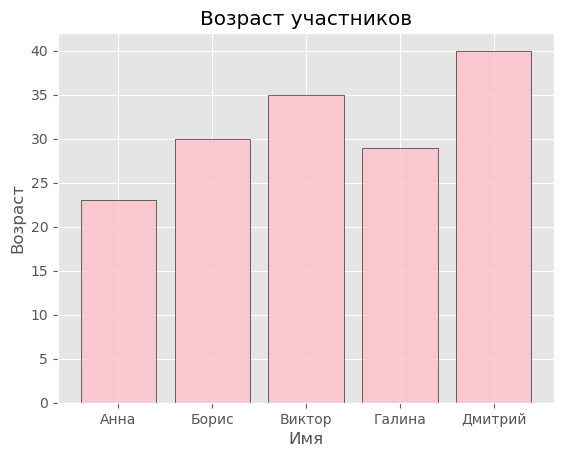

In [18]:
data = {
    'Имя': ['Анна', 'Борис', 'Виктор', 'Галина', 'Дмитрий'],
    'Возраст': [23, 30, 35, 29, 40]
}

df = pd.DataFrame(data)

# sns.barplot(data=df, x='Имя', y='Возраст', color="pink", edgecolor="black", alpha=0.8)

plt.bar(df['Имя'], df['Возраст'], color="pink", edgecolor="black", alpha=0.8)

plt.xlabel("Имя")
plt.ylabel("Возраст")
plt.title("Возраст участников")